In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

### [1] 데이터 불러오기 및 확인

In [186]:
gender = pd.read_csv('gender_classification_v7.csv')
gender

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


- long hair : 머리가 긴지 여부
- forehead_width_cm : 이마 너비
- forehead_height_cm : 이마 높이
- nose_wide : 코가 넓은지 여부
- nose_long : 코가 긴지 여부
- lips_thin : 입술이 얇은지 여부
- distance_nose_to_lip_long : 코와 입술 사이의 거리가 긴지 여부
- gender : 성별

In [187]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [188]:
gender.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [189]:
gender['gender'].value_counts() # 균형 데이터

gender
Female    2501
Male      2500
Name: count, dtype: int64

### [2] 결측치 확인

In [190]:
gender.isna().sum().sum() # 결측치 없음

0

### [3] 이상치 확인

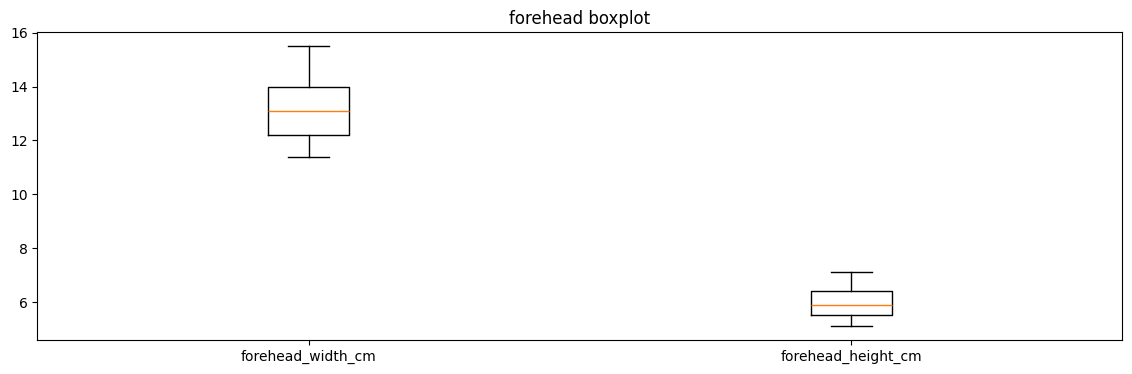

In [191]:
plt.figure(figsize = (14, 4))
plt.boxplot(gender[['forehead_width_cm', 'forehead_height_cm']])
plt.title('forehead boxplot')
plt.xticks(np.arange(1, 3), ['forehead_width_cm', 'forehead_height_cm'])
plt.show()
# 이상치 없음

### [4] 피쳐 시각화

In [192]:
gender[gender.columns[0]].unique()

array([1, 0], dtype=int64)

In [193]:
gender[gender.columns[0]].value_counts()

long_hair
1    4349
0     652
Name: count, dtype: int64

In [194]:
display_gender_df = gender.copy()
display_gender_df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


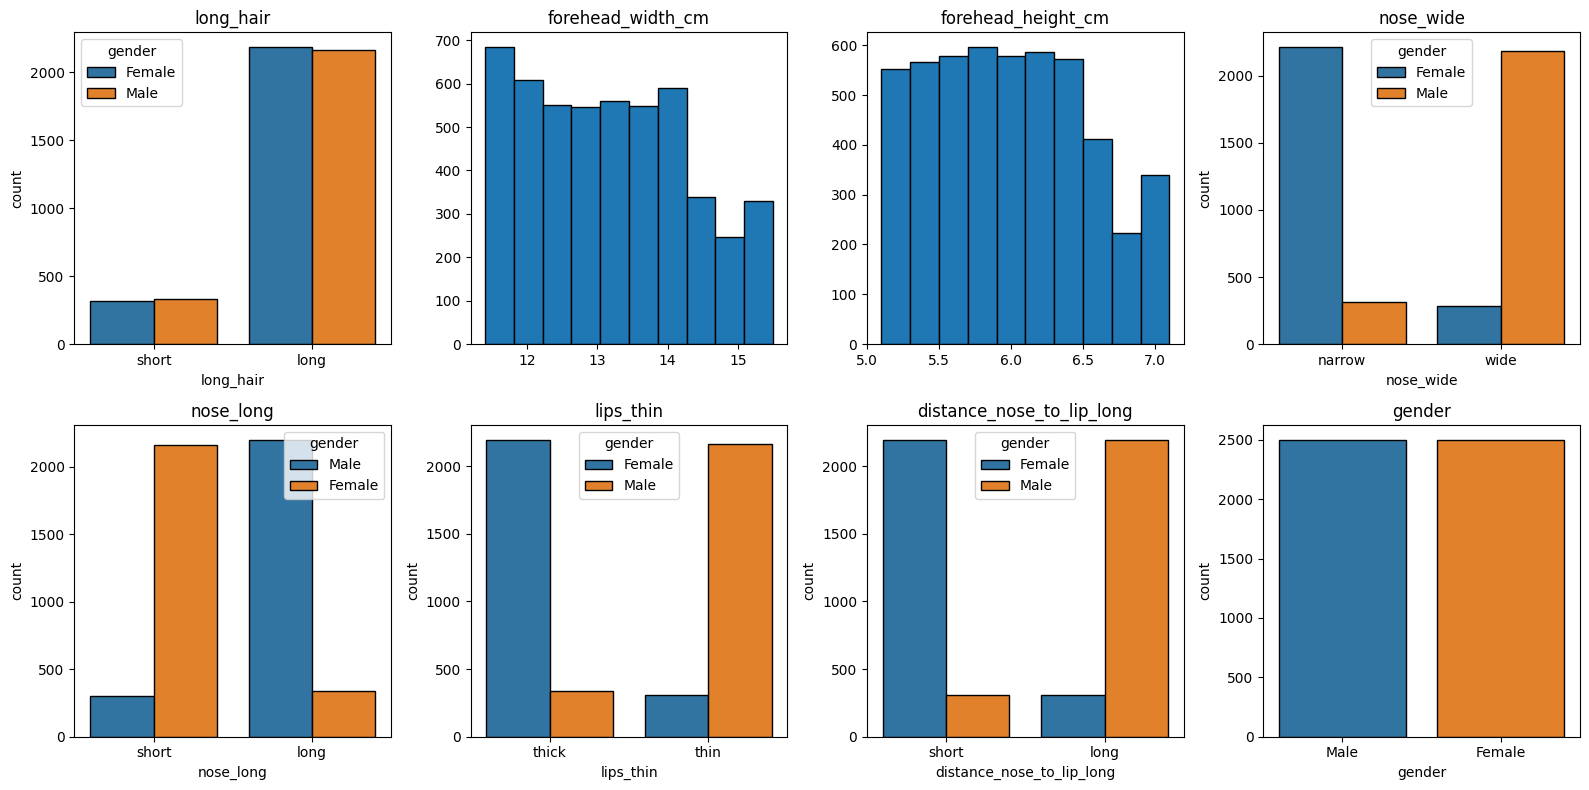

In [195]:
fig, axs = plt.subplots(2, 4, figsize = (16, 8))

name_dict = {'long_hair' : ['short', 'long'], 'nose_wide' : ['narrow', 'wide'],
             'nose_long' : ['short', 'long'], 'lips_thin' : ['thick', 'thin'],
             'distance_nose_to_lip_long' : ['short', 'long'], 'gender' : ['Male', 'Female']}

for i in range(2):
    for j in range(4):
        if i == 0 and (j == 1 or j == 2): # 2, 3번째 히스토그램
            axs[i,j].hist(gender[gender.columns[4*i + j]], edgecolor = 'black')
            axs[i,j].set_title(gender.columns[4*i + j])
        else:
            sns.countplot(data=gender, x=gender.columns[4*i + j], hue='gender', ax = axs[i, j], edgecolor = 'black')

            axs[i,j].set_xticks(np.arange(2))
            axs[i,j].set_xticklabels(name_dict[gender.columns[4*i + j]])
            axs[i,j].set_title(gender.columns[4*i + j])

plt.tight_layout()

### [5] 부트스트랩 샘플링 진행

- 샘플 수가 부족해서 1000개 추가 샘플링

In [196]:
bootstrap_samples = gender.sample(n=1000, replace=True, random_state=10)
boot_gender = pd.concat([gender, bootstrap_samples]).reset_index(drop=True)
boot_gender

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
5996,1,13.1,5.6,1,1,0,0,Male
5997,1,13.5,5.9,0,1,0,0,Female
5998,1,13.1,5.6,0,0,1,0,Female
5999,1,12.3,5.8,1,0,0,1,Male


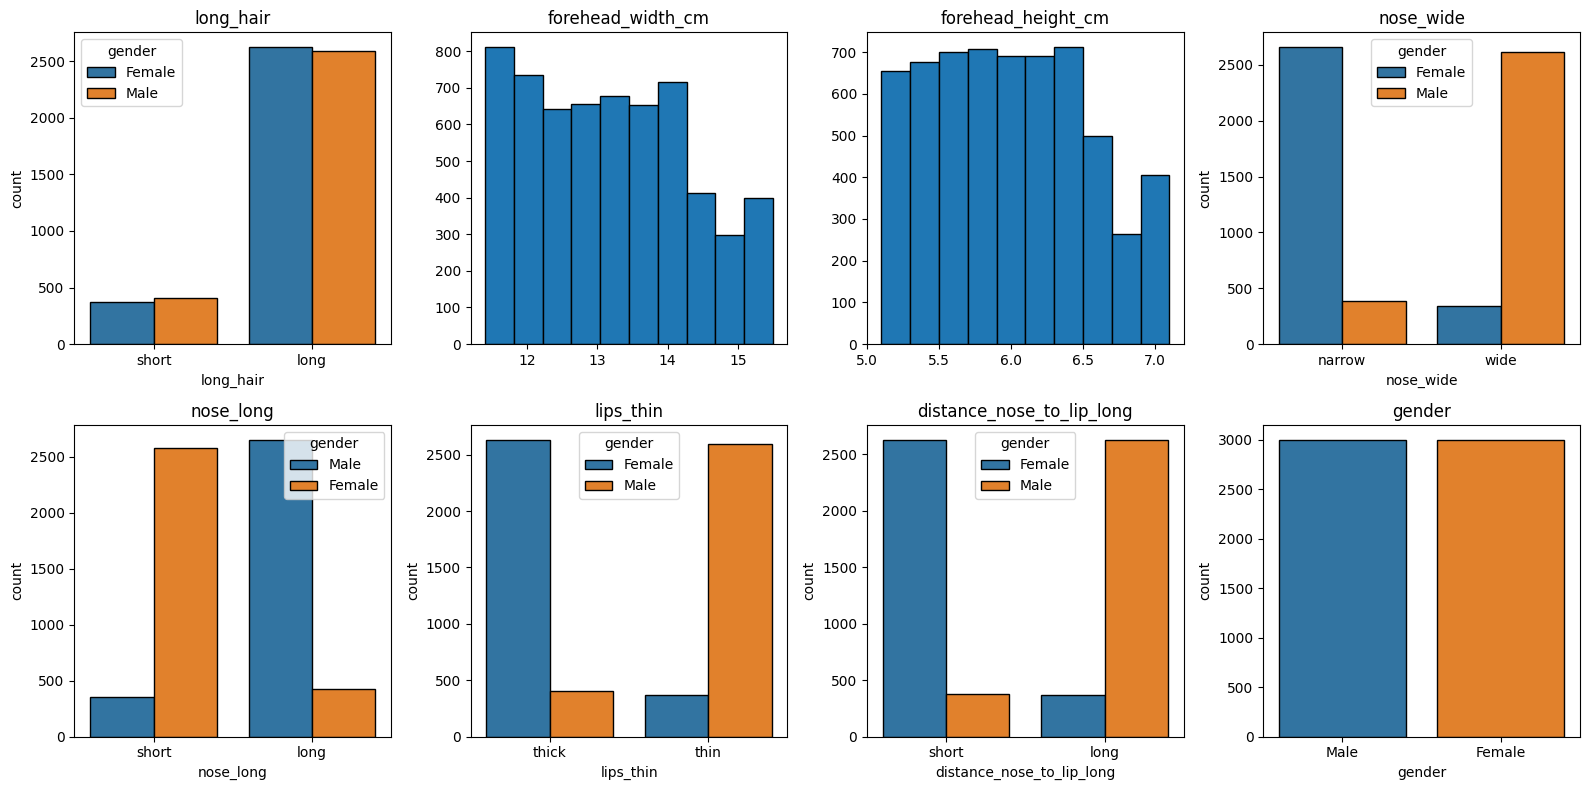

In [197]:
fig, axs = plt.subplots(2, 4, figsize = (16, 8))

name_dict = {'long_hair' : ['short', 'long'], 'nose_wide' : ['narrow', 'wide'],
             'nose_long' : ['short', 'long'], 'lips_thin' : ['thick', 'thin'],
             'distance_nose_to_lip_long' : ['short', 'long'], 'gender' : ['Male', 'Female']}

for i in range(2):
    for j in range(4):
        if i == 0 and (j == 1 or j == 2): # 2, 3번째 히스토그램
            axs[i,j].hist(boot_gender[boot_gender.columns[4*i + j]], edgecolor = 'black')
            axs[i,j].set_title(boot_gender.columns[4*i + j])
        else:
            sns.countplot(data=boot_gender, x=boot_gender.columns[4*i + j], hue='gender', ax = axs[i, j], edgecolor = 'black')

            axs[i,j].set_xticks(np.arange(2))
            axs[i,j].set_xticklabels(name_dict[boot_gender.columns[4*i + j]])
            axs[i,j].set_title(boot_gender.columns[4*i + j])

plt.tight_layout()

In [198]:
# gender 컬럼 0(남자), 1(여자)로 변경
gender_list = []
for i in boot_gender['gender']:
    if i == 'Male': gender_list.append(0)
    else: gender_list.append(1)

boot_gender['gender'] = gender_list
boot_gender

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1
...,...,...,...,...,...,...,...,...
5996,1,13.1,5.6,1,1,0,0,0
5997,1,13.5,5.9,0,1,0,0,1
5998,1,13.1,5.6,0,0,1,0,1
5999,1,12.3,5.8,1,0,0,1,0


### [6] 훈련/테스트 세트 분리

In [199]:
featureDF = boot_gender.iloc[:, :-1]
targetSR = boot_gender['gender']

In [200]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR,
                                                    stratify = targetSR,
                                                    train_size = 0.8,
                                                    random_state = 10)

In [201]:
print(f"X_train : {X_train.shape}, y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}, y_test : {y_test.shape}")

X_train : (4800, 7), y_train : (4800,)
X_test : (1201, 7), y_test : (1201,)


### [7] 스케일링

In [202]:
mm = MinMaxScaler()
ss = StandardScaler()

mm.fit(X_train[['forehead_width_cm', 'forehead_height_cm']])
ss.fit(X_train[['forehead_width_cm', 'forehead_height_cm']])

StandardScaler()

In [203]:
X_train_mm_scaled = mm.transform(X_train[['forehead_width_cm', 'forehead_height_cm']])
X_test_mm_scaled = mm.transform(X_test[['forehead_width_cm', 'forehead_height_cm']])

X_train_ss_scaled = ss.transform(X_train[['forehead_width_cm', 'forehead_height_cm']])
X_test_ss_scaled = ss.transform(X_test[['forehead_width_cm', 'forehead_height_cm']])

In [204]:
X_train_mm = X_train.copy()
X_test_mm = X_test.copy()

X_train_ss = X_train.copy()
X_test_ss = X_test.copy()

In [205]:
X_train_mm[['forehead_width_cm', 'forehead_height_cm']] = X_train_mm_scaled
X_test_mm[['forehead_width_cm', 'forehead_height_cm']] = X_test_mm_scaled

X_train_ss[['forehead_width_cm', 'forehead_height_cm']] = X_train_ss_scaled
X_test_ss[['forehead_width_cm', 'forehead_height_cm']] = X_test_ss_scaled

In [206]:
X_train_mm

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
2265,1,0.487805,0.20,0,1,1,1
1721,1,0.707317,0.40,0,0,0,0
3159,1,0.243902,0.75,1,1,1,1
3642,1,0.951220,0.70,0,1,1,0
3420,1,0.512195,0.65,0,0,0,0
...,...,...,...,...,...,...,...
3594,1,0.121951,0.40,0,0,0,0
3189,1,0.121951,0.70,0,1,0,0
4734,1,1.000000,0.95,1,1,1,1
4726,1,0.487805,0.30,0,1,0,0


### [8] 결정트리 (Decision Tree)

#### [8-1] MinMax 스케일링으로 기본 모델 학습

In [207]:
dt = DecisionTreeClassifier(random_state=10)

dt.fit(X_train_mm, y_train)

DecisionTreeClassifier(random_state=10)

In [208]:
print(f"훈련 세트 Accuracy : {dt.score(X_train_mm, y_train):.4f}")
print(f"테스트 세트 Accuracy : {dt.score(X_test_mm, y_test):.4f}")

훈련 세트 Accuracy : 0.9981
테스트 세트 Accuracy : 0.9775


> 기본으로 돌렸는데도 성능이 매우 좋다.

In [209]:
y_train_mm_pred = dt.predict(X_train_mm)
y_test_mm_pred = dt.predict(X_test_mm)

print(f"훈련 세트 성능 리포트\n{classification_report(y_train, y_train_mm_pred)}")
print()
print(f"테스트 세트 성능 리포트\n{classification_report(y_test, y_test_mm_pred)}")

훈련 세트 성능 리포트
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2401
           1       1.00      1.00      1.00      2399

    accuracy                           1.00      4800
   macro avg       1.00      1.00      1.00      4800
weighted avg       1.00      1.00      1.00      4800


테스트 세트 성능 리포트
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       601
           1       0.98      0.98      0.98       600

    accuracy                           0.98      1201
   macro avg       0.98      0.98      0.98      1201
weighted avg       0.98      0.98      0.98      1201



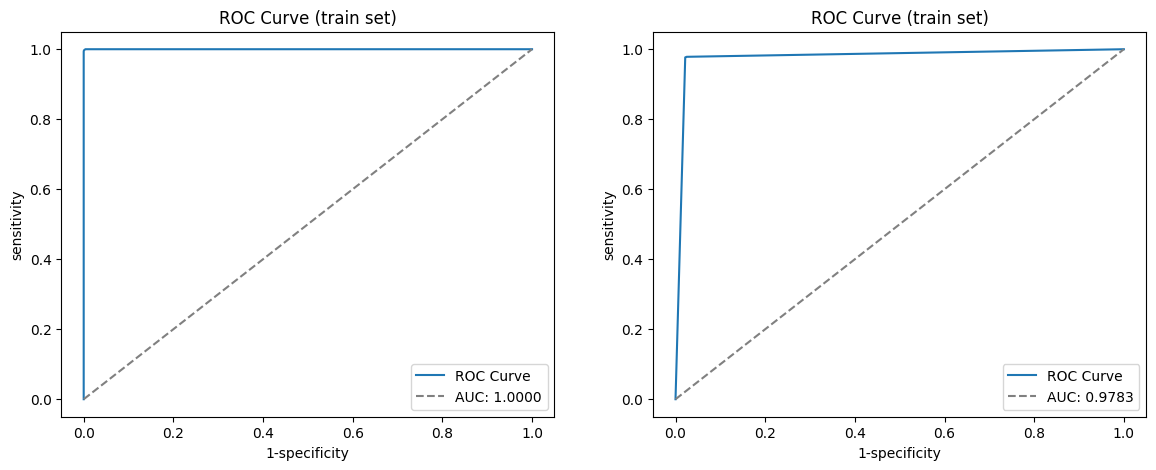

In [210]:
y_train_mm_pred_proba = dt.predict_proba(X_train_mm)[:, 1]
y_test_mm_pred_proba = dt.predict_proba(X_test_mm)[:, 1]

train_mm_fprs, train_mm_tprs, train_mm_thresholds = roc_curve(y_train, y_train_mm_pred_proba)
test_mm_fprs, test_mm_tprs, test_mm_thresholds = roc_curve(y_test, y_test_mm_pred_proba)

roc_curve_list = [roc_curve(y_train, y_train_mm_pred_proba), roc_curve(y_test, y_test_mm_pred_proba)]
y_list = [y_train, y_test]
y_pred_list = [y_train_mm_pred_proba, y_test_mm_pred_proba]

fig, axs = plt.subplots(1, 2, figsize = (14, 5))
for i in range(2):
    axs[i].plot(roc_curve_list[i][0], roc_curve_list[i][1], label = 'ROC Curve')
    axs[i].plot([0,1], color = 'gray', linestyle = '--',
                label = f"AUC: {roc_auc_score(y_list[i], y_pred_list[i]):.4f}")
    axs[i].set_title('ROC Curve (train set)')
    axs[i].set_xlabel('1-specificity')
    axs[i].set_ylabel('sensitivity')
    axs[i].legend()
plt.show()

#### [8-2] Standard 스케일링으로 기본 모델 학습

In [211]:
dt = DecisionTreeClassifier(random_state=10)

dt.fit(X_train_ss, y_train)

DecisionTreeClassifier(random_state=10)

In [212]:
print(f"훈련 세트 Accuracy : {dt.score(X_train_ss, y_train):.4f}")
print(f"테스트 세트 Accuracy : {dt.score(X_test_ss, y_test):.4f}")

훈련 세트 Accuracy : 0.9981
테스트 세트 Accuracy : 0.9767


> 기본으로 돌렸는데도 성능이 매우 좋다.

In [213]:
y_train_ss_pred = dt.predict(X_train_ss)
y_test_ss_pred = dt.predict(X_test_ss)

print(f"훈련 세트 성능 리포트\n{classification_report(y_train, y_train_ss_pred)}")
print()
print(f"테스트 세트 성능 리포트\n{classification_report(y_test, y_test_ss_pred)}")

훈련 세트 성능 리포트
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2401
           1       1.00      1.00      1.00      2399

    accuracy                           1.00      4800
   macro avg       1.00      1.00      1.00      4800
weighted avg       1.00      1.00      1.00      4800


테스트 세트 성능 리포트
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       601
           1       0.98      0.98      0.98       600

    accuracy                           0.98      1201
   macro avg       0.98      0.98      0.98      1201
weighted avg       0.98      0.98      0.98      1201



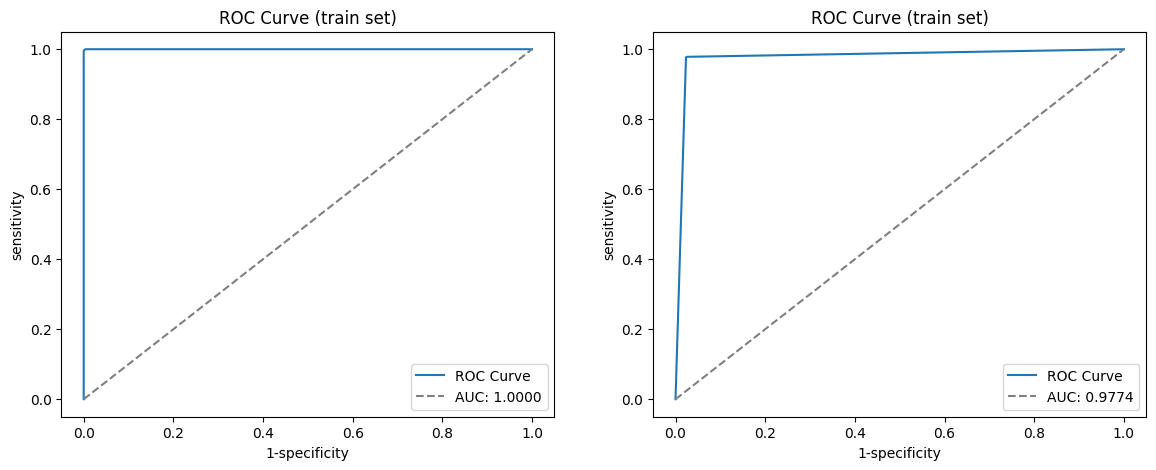

In [214]:
y_train_ss_pred_proba = dt.predict_proba(X_train_ss)[:, 1]
y_test_ss_pred_proba = dt.predict_proba(X_test_ss)[:, 1]

train_ss_fprs, train_ss_tprs, train_ss_thresholds = roc_curve(y_train, y_train_ss_pred_proba)
test_ss_fprs, test_ss_tprs, test_ss_thresholds = roc_curve(y_test, y_test_ss_pred_proba)

roc_curve_list = [roc_curve(y_train, y_train_ss_pred_proba), roc_curve(y_test, y_test_ss_pred_proba)]
y_list = [y_train, y_test]
y_pred_list = [y_train_ss_pred_proba, y_test_ss_pred_proba]

fig, axs = plt.subplots(1, 2, figsize = (14, 5))
for i in range(2):
    axs[i].plot(roc_curve_list[i][0], roc_curve_list[i][1], label = 'ROC Curve')
    axs[i].plot([0,1], color = 'gray', linestyle = '--',
                label = f"AUC: {roc_auc_score(y_list[i], y_pred_list[i]):.4f}")
    axs[i].set_title('ROC Curve (train set)')
    axs[i].set_xlabel('1-specificity')
    axs[i].set_ylabel('sensitivity')
    axs[i].legend()
plt.show()

> 스케일링 종류에 따른 성능 차이는 크게 없지만 MinMax 스케일링의 점수가 조금 더 높다.

### [9] 하이퍼 파라미터 튜닝

#### [9-1] MinMax 스케일링으로 학습

>max_depth: 트리의 최대 깊이 지정  
min_samples_split: 노드를 분할하기 위한 최소 샘플 수 지정  
min_samples_leaf: 리프 노드가 가져야 하는 최소 샘플 수 지정  
max_features: 각 노드에서 분할에 사용할 특성의 최대 수 지정  
criterion: 노드에서의 분할 기준 선택 (기본값은 'gini'이며, 'entropy'도 사용 가능)  

In [215]:
# 탐색할 하이퍼 파라미터 그리드 설정
param_dt = {
    'max_depth': [1, 3, 5, 7],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [216]:
dt = DecisionTreeClassifier(random_state=10)

# GridSearchCV 객체 생성
dt_grid_search = GridSearchCV(estimator=dt, param_grid = param_dt,
                              cv = 5, scoring = 'accuracy')

# 그리드 탐색 수행
dt_grid_search.fit(X_train_mm, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='accuracy')

In [217]:
dt_grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='sqrt',
                       random_state=10)

In [218]:
print(f"훈련 세트 Accuracy : {dt_grid_search.best_estimator_.score(X_train_mm, y_train):.4f}")
print(f"테스트 세트 Accuracy : {dt_grid_search.best_estimator_.score(X_test_mm, y_test):.4f}")

훈련 세트 Accuracy : 0.9675
테스트 세트 Accuracy : 0.9625


> GridSearch를 했더니 더 점수가 낮아졌다.

In [219]:
y_train_mm_pred = dt_grid_search.best_estimator_.predict(X_train_mm)
y_test_mm_pred = dt_grid_search.best_estimator_.predict(X_test_mm)

print(f"{'-'*17}훈련 세트 평가 지표{'-'*17}\n{classification_report(y_train, y_train_mm_pred)}")
print()
print(f"{'-'*16}테스트 세트 평가 지표{'-'*16}\n{classification_report(y_test, y_test_mm_pred)}")

-----------------훈련 세트 평가 지표-----------------
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2401
           1       0.96      0.98      0.97      2399

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800


----------------테스트 세트 평가 지표----------------
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       601
           1       0.96      0.97      0.96       600

    accuracy                           0.96      1201
   macro avg       0.96      0.96      0.96      1201
weighted avg       0.96      0.96      0.96      1201



In [220]:
train_mm_fprs, train_mm_tprs, train_mm_thresholds = roc_curve(y_train, y_train_mm_pred)
test_mm_fprs, test_mm_tprs, test_mm_thresholds = roc_curve(y_test, y_test_mm_pred)

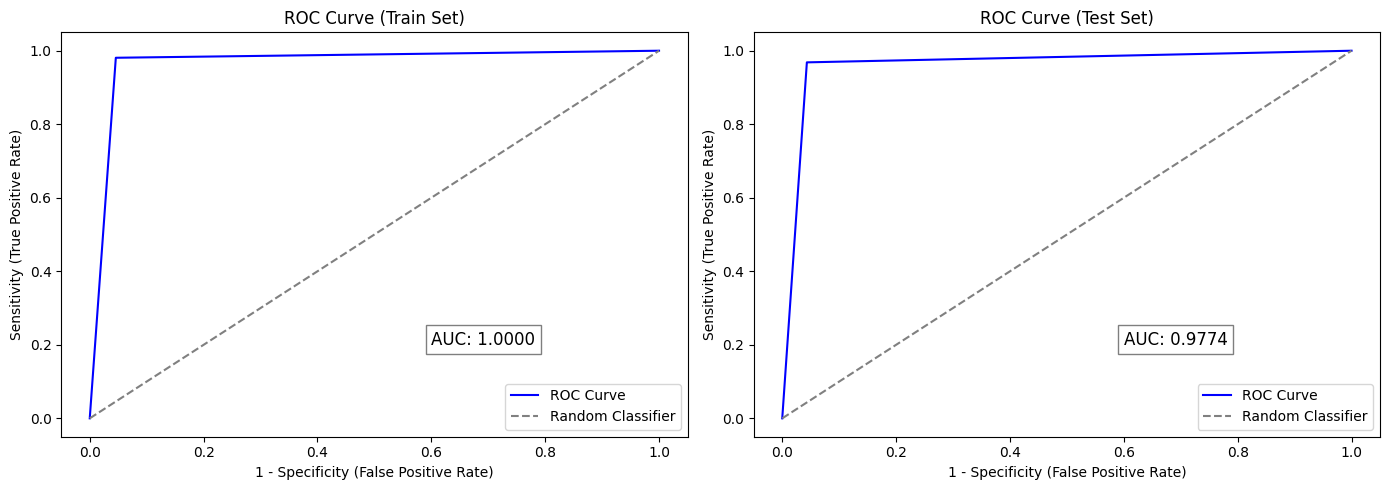

In [221]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
titles = ['ROC Curve (Train Set)', 'ROC Curve (Test Set)']

roc_curve_list = [roc_curve(y_train, y_train_mm_pred), roc_curve(y_test, y_test_mm_pred)]
y_list = [y_train, y_test]

for i in range(2):
    # ROC 커브 그리기
    axs[i].plot(roc_curve_list[i][0], roc_curve_list[i][1], label='ROC Curve', color='blue')
    
    # 무작위 분류기 대각선 그리기
    axs[i].plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
    
    # AUC 값 계산 및 표시
    auc_score = roc_auc_score(y_list[i], y_pred_list[i])
    axs[i].text(0.6, 0.2, f'AUC: {auc_score:.4f}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))
    
    # 제목, 축 라벨 설정
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('1 - Specificity (False Positive Rate)')
    axs[i].set_ylabel('Sensitivity (True Positive Rate)')
    
    # 범례 추가
    axs[i].legend(loc='lower right')

plt.tight_layout()
plt.show()


### [10] 중요한 변수만 넣고 다시 학습

In [167]:
feature_importances_dict = {key : value for key,
                            value in zip(dt_grid_search.best_estimator_.feature_names_in_,
                                         dt_grid_search.best_estimator_.feature_importances_.round(3))}

sorted(feature_importances_dict.items(), key = lambda x : x[1], reverse = True)

[('distance_nose_to_lip_long', 0.443),
 ('forehead_width_cm', 0.208),
 ('nose_wide', 0.139),
 ('lips_thin', 0.108),
 ('forehead_height_cm', 0.058),
 ('nose_long', 0.043),
 ('long_hair', 0.001)]

> 변수 중요도가 10% 이상인 변수들만 넣기

In [168]:
new_X_train_mm = X_train_mm.loc[:, ['distance_nose_to_lip_long', 'forehead_width_cm']]
new_X_test_mm = X_test_mm.loc[:, ['distance_nose_to_lip_long', 'forehead_width_cm']]

In [169]:
# new_X_train_mm = X_train_mm.loc[:, ['distance_nose_to_lip_long']]
# new_X_test_mm = X_test_mm.loc[:, ['distance_nose_to_lip_long']]

In [170]:
# 탐색할 하이퍼 파라미터 그리드 설정
param_dt = {
    'max_depth': [1, 3, 5, 7],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [171]:
dt = DecisionTreeClassifier(random_state=10)

# GridSearchCV 객체 생성
dt_grid_search = GridSearchCV(estimator=dt, param_grid = param_dt,
                              cv = 5, scoring = 'accuracy')

# 그리드 탐색 수행
dt_grid_search.fit(new_X_train_mm, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='accuracy')

In [172]:
dt_grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=10)

In [173]:
print(f"훈련 세트 Accuracy : {dt_grid_search.best_estimator_.score(new_X_train_mm, y_train):.4f}")
print(f"테스트 세트 Accuracy : {dt_grid_search.best_estimator_.score(new_X_test_mm, y_test):.4f}")

훈련 세트 Accuracy : 0.9023
테스트 세트 Accuracy : 0.8884


> GridSearch를 했더니 더 점수가 낮아졌다.

In [174]:
y_train_mm_pred = dt_grid_search.best_estimator_.predict(new_X_train_mm)
y_test_mm_pred = dt_grid_search.best_estimator_.predict(new_X_test_mm)

print(f"훈련 세트 성능 리포트\n{classification_report(y_train, y_train_mm_pred)}")
print()
print(f"테스트 세트 성능 리포트\n{classification_report(y_test, y_test_mm_pred)}")

훈련 세트 성능 리포트
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2401
           1       0.92      0.89      0.90      2399

    accuracy                           0.90      4800
   macro avg       0.90      0.90      0.90      4800
weighted avg       0.90      0.90      0.90      4800


테스트 세트 성능 리포트
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       601
           1       0.90      0.87      0.89       600

    accuracy                           0.89      1201
   macro avg       0.89      0.89      0.89      1201
weighted avg       0.89      0.89      0.89      1201



In [175]:
train_mm_fprs, train_mm_tprs, train_mm_thresholds = roc_curve(y_train, y_train_mm_pred)
test_mm_fprs, test_mm_tprs, test_mm_thresholds = roc_curve(y_test, y_test_mm_pred)

In [176]:
roc_auc_score(y_train, y_train_mm_pred)

0.9022849656744732

In [177]:
roc_auc_score(y_test, y_test_mm_pred)

0.8884095951192456

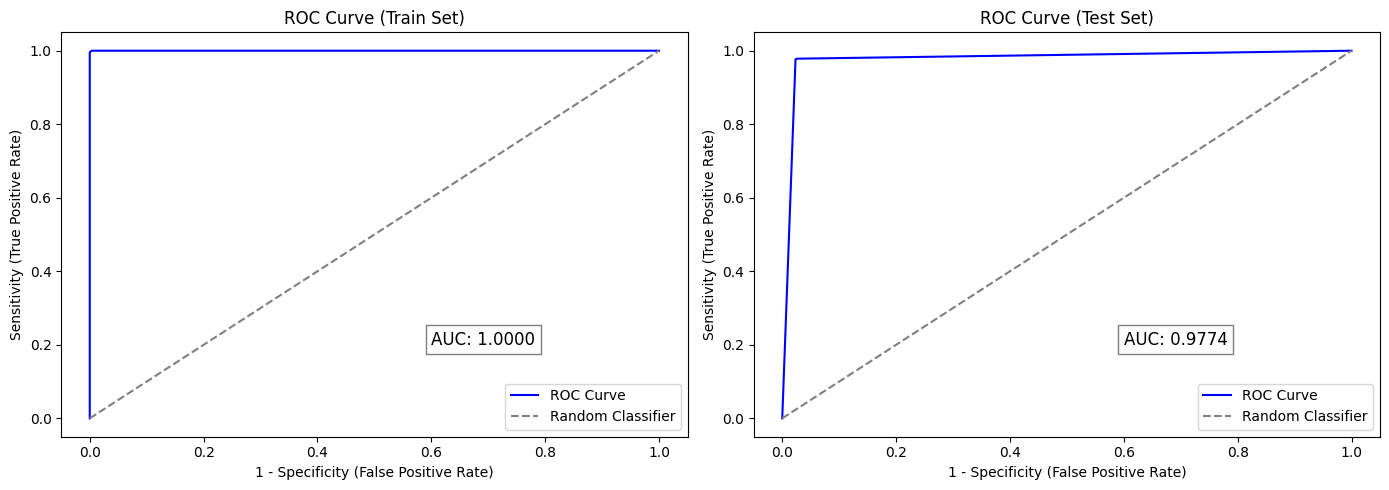

In [178]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
titles = ['ROC Curve (Train Set)', 'ROC Curve (Test Set)']

for i in range(2):
    # ROC 커브 그리기
    axs[i].plot(roc_curve_list[i][0], roc_curve_list[i][1], label='ROC Curve', color='blue')
    
    # 무작위 분류기 대각선 그리기
    axs[i].plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
    
    # AUC 값 계산 및 표시
    auc_score = roc_auc_score(y_list[i], y_pred_list[i])
    axs[i].text(0.6, 0.2, f'AUC: {auc_score:.4f}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))
    
    # 제목, 축 라벨 설정
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('1 - Specificity (False Positive Rate)')
    axs[i].set_ylabel('Sensitivity (True Positive Rate)')
    
    # 범례 추가
    axs[i].legend(loc='lower right')

plt.tight_layout()
plt.show()


In [179]:
# fig, axs = plt.subplots(1, 2, figsize=(14, 5))
# titles = ['ROC Curve (Train Set)', 'ROC Curve (Test Set)']

# roc_curve_list = [roc_curve(y_train, y_train_mm_pred), roc_curve(y_test, y_test_mm_pred)]

# for i in range(2):
#     # ROC 커브 그리기
#     axs[i].plot(roc_curve_list[i][0], roc_curve_list[i][1], label='ROC Curve', color='blue')
    
#     # 무작위 분류기 대각선 그리기
#     axs[i].plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
    
#     # AUC 값 계산 및 표시
#     auc_score = [roc_auc_score(y_train, y_train_mm_pred), roc_auc_score(y_test, y_test_mm_pred)]
#     axs[i].text(0.6, 0.2, f'AUC: {auc_score[i]:.4f}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))
    
#     # 제목, 축 라벨 설정
#     axs[i].set_title(titles[i])
#     axs[i].set_xlabel('1 - Specificity (False Positive Rate)')
#     axs[i].set_ylabel('Sensitivity (True Positive Rate)')
    
#     # 범례 추가
#     axs[i].legend(loc='lower right')

# plt.tight_layout()
# plt.show()


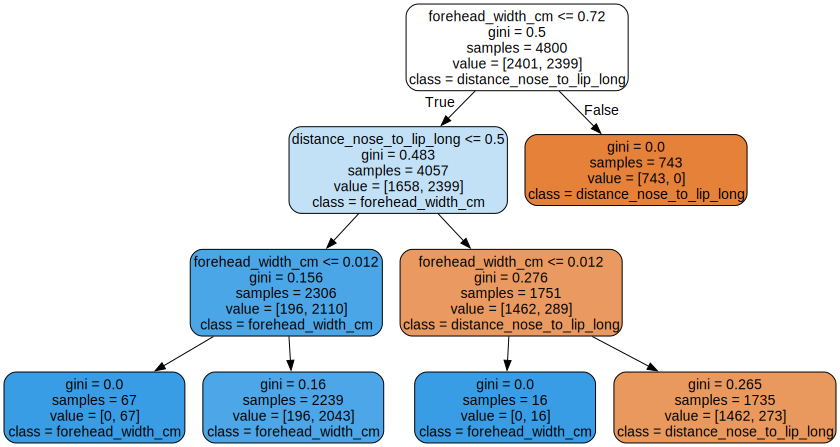

In [180]:
# (1) DT모델을 dot포맷의 파일로 저장 ==> export_graphviz()
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt_grid_search.best_estimator_, out_file='tree.dot',
                class_names=['distance_nose_to_lip_long',
                             'forehead_width_cm', 'nose_wide', 'lips_thin'],
                feature_names=dt_grid_search.best_estimator_.feature_names_in_,
                impurity=True, filled=True, rounded=True)

# (2) dot파일 출력
# 파일에서 데이터 읽어오기
with open('tree.dot') as f:
    dot_data = f.read()

# 화면에 출력하기
graphviz.Source(dot_data)